# 데이터 기본 정보 조회

In [1]:
import pandas as pd
import numpy as np

# 날짜
import datetime as dt

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 머신러닝
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier

#경고 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글폰트 설치

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 폰트 리스트 확인

# import matplotlib.font_manager as fm
# font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# font_list[:]

In [3]:
# 데이터 로드
# path: SAi-Da_튜토리얼_버스/data/bus_final.csv
df = pd.read_csv("./data/bus_final.csv")

In [4]:
# 데이터 프레임 상단 5개 조회
df.head(3)

,bstopId,routeNo,routeId,bstopNm,busId,LATEST_STOP_NAME,Bus_Num_Plate,Rest_Stop_Count,ARRIVALESTIMATETIME,ThisDT
0,113000424,M6724,165000381,합정역,7331704,동춘역(이마트.스퀘어원),인천73아1704,5,2757,2022-02-16 15:05:22
1,164000346,M6724,165000381,동춘역,7331707,부천IC출입(미정차),인천73아1707,1,1649,2022-02-16 15:05:24
2,113000424,M6724,165000381,합정역,7331704,동춘역(이마트.스퀘어원),인천73아1704,5,2633,2022-02-16 15:06:01


In [5]:
df.tail(3)

,bstopId,routeNo,routeId,bstopNm,busId,LATEST_STOP_NAME,Bus_Num_Plate,Rest_Stop_Count,ARRIVALESTIMATETIME,ThisDT
257287,164000346,M6724,165000381,동춘역,7331702,신월IC(미정차),인천73아1702,2,2299,2022-04-13 16:00:26
257288,113000424,M6724,165000381,합정역,7331706,동춘역(이마트.스퀘어원),인천73아1706,5,2333,2022-04-13 16:00:52
257289,164000346,M6724,165000381,동춘역,7331702,신월IC(미정차),인천73아1702,2,2278,2022-04-13 16:00:54


In [6]:
# 인덱스 유니크값 수 = 전체 데이터 수
df.index.nunique()

257290

In [7]:
# 기본 통계량
df.describe()

,bstopId,routeId,busId,Rest_Stop_Count,ARRIVALESTIMATETIME
count,2.572900e+05,257290.0,2.572900e+05,257290.000000,257290.000000
mean,1.384341e+08,165000381.0,7.331693e+06,3.908970,1514.213996
std,2.549988e+07,0.0,6.395247e+01,2.317859,1041.779962
min,1.130004e+08,165000381.0,7.331348e+06,1.000000,18.000000
25%,1.130004e+08,165000381.0,7.331703e+06,2.000000,664.000000
50%,1.130004e+08,165000381.0,7.331705e+06,4.000000,1289.000000
75%,1.640003e+08,165000381.0,7.331707e+06,5.000000,2233.000000
max,1.640003e+08,165000381.0,7.331708e+06,11.000000,5863.000000


In [8]:
# 데이터 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257290 entries, 0 to 257289
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   bstopId              257290 non-null  int64 
 1   routeNo              257290 non-null  object
 2   routeId              257290 non-null  int64 
 3   bstopNm              257290 non-null  object
 4   busId                257290 non-null  int64 
 5   LATEST_STOP_NAME     257290 non-null  object
 6   Bus_Num_Plate        257290 non-null  object
 7   Rest_Stop_Count      257290 non-null  int64 
 8   ARRIVALESTIMATETIME  257290 non-null  int64 
 9   ThisDT               257290 non-null  object
dtypes: int64(5), object(5)
memory usage: 19.6+ MB


In [9]:
# 결측치 조회
df.isnull().sum()

# 결측치 제거
# df.dropna(inplace=True)

bstopId                0
routeNo                0
routeId                0
bstopNm                0
busId                  0
LATEST_STOP_NAME       0
Bus_Num_Plate          0
Rest_Stop_Count        0
ARRIVALESTIMATETIME    0
ThisDT                 0
dtype: int64

In [10]:
# 데이터 ThisDT 변수 datatime 타입으로 변환
df['ThisDT'] =  pd.to_datetime(df['ThisDT'])

# ThisDT 변수 인덱스로 변환
# df = df.set_index('ThisDT')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257290 entries, 0 to 257289
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   bstopId              257290 non-null  int64         
 1   routeNo              257290 non-null  object        
 2   routeId              257290 non-null  int64         
 3   bstopNm              257290 non-null  object        
 4   busId                257290 non-null  int64         
 5   LATEST_STOP_NAME     257290 non-null  object        
 6   Bus_Num_Plate        257290 non-null  object        
 7   Rest_Stop_Count      257290 non-null  int64         
 8   ARRIVALESTIMATETIME  257290 non-null  int64         
 9   ThisDT               257290 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 19.6+ MB


# 불필요 데이터 제거

In [12]:
# 고유값 확인
df.nunique()

bstopId                     4
routeNo                     1
routeId                     1
bstopNm                     3
busId                       9
LATEST_STOP_NAME           18
Bus_Num_Plate               9
Rest_Stop_Count            11
ARRIVALESTIMATETIME      4745
ThisDT                 257290
dtype: int64

In [13]:
# 고유값이 1인 변수 제거 > 분석에 무의미
# bstopNm 제거 > bstopId 와 의미 중복
df.drop(columns=['routeNo', 'routeId', 'bstopNm', 'LATEST_STOP_NAME', 'Bus_Num_Plate'], inplace=True)

# 라벨링

In [14]:
# stopId 변수 라벨링
bstopId_list = df.bstopId.unique().tolist()
df.insert(1,'bstopId_rabel',df.bstopId.map(lambda x: bstopId_list.index(x)))

# stopId 변수 라벨링
busId_list = df.busId.unique().tolist()
df.insert(3,'busId_rabel',df.busId.map(lambda x: busId_list.index(x)))

df.drop(columns=['bstopId', 'busId'], inplace=True)

# 날짜 데이터

In [15]:
# 날짜 변수 생성
# df['year'] = df['ThisDT'].dt.year
df['month'] = df['ThisDT'].dt.month
df['day'] = df['ThisDT'].dt.day
df['hour'] = df['ThisDT'].dt.hour
df['minute'] = df['ThisDT'].dt.minute
df['second'] = df['ThisDT'].dt.second

# 요일 생성
df['weekno'] = df['ThisDT'].dt.weekday
# 평일 주말 구분
df['weekday'] = 0
# 평일은 0
cond = (df['weekno'] < 5)
df.loc[cond, 'weekday'] = 0
# 주말은 1
cond = (df['weekno'] >= 5)
df.loc[cond, 'weekday'] = 1

df.drop(columns = ['weekno'], inplace=True)

# 테스트 데이터 생성

In [16]:
# 학습과 테스트 데이터 분리
# 4월 1일 전 후로 생성
df_train = df.query('ThisDT <= "2022-04-01"').copy()
df_test = df.query('ThisDT > "2022-04-01"').copy()

In [17]:
# datetime 날짜 제거 > 모델 학습에 datetime 형식 지원 안 함
df_train.drop(columns = ['ThisDT'], inplace=True)
df_test.drop(columns = ['ThisDT'], inplace=True)

In [18]:
# x, y 분리
df_train_y = df_train.loc[:,'ARRIVALESTIMATETIME']
df_train_x = df_train.drop('ARRIVALESTIMATETIME', axis=1)
df_test_y = df_test.loc[:,'ARRIVALESTIMATETIME']
df_test_x = df_test.drop('ARRIVALESTIMATETIME', axis=1)
# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
df_test_orig = df_test.loc[:, ['ARRIVALESTIMATETIME']]

# 회귀 모델 학습

## 하이퍼파라미터 튜닝 

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor, XGBClassifier

params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
#     'objective': ['reg:squarederror'],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0.5, 1, 1.5 ,2 ,3]
}

rcv_xgboost = RandomizedSearchCV(XGBRegressor(), params, random_state=1, cv=5, n_iter=50, scoring='neg_mean_squared_error')

rcv_xgboost.fit(df_train_x, df_train_y)

print(rcv_xgboost.best_score_)

print(rcv_xgboost.best_params_)

-101222.23745646725
{'subsample': 0.8, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.9}


## 모델 학습 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

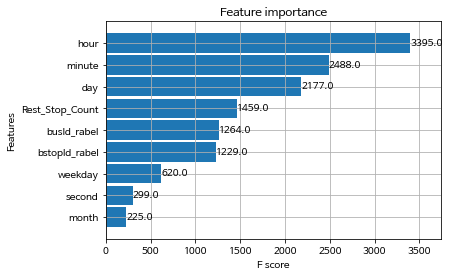

In [25]:
XG_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, gamma=0.5, colsample_bytree=0.9, max_depth=7, subsample=0.8)
XG_model.fit(df_train_x, df_train_y, eval_set=[(df_test_x, df_test_y)], early_stopping_rounds=50,verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(XG_model, height=0.9)
# 버스 번호, 최근 정차 정류장은 학습에 영향이 적음

# 모델 유의성 검정

In [29]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predictions = XG_model.predict(df_test_x)
predictions

r_sq = XG_model.score(df_test_x, df_test_y)
mse = mean_squared_error(df_test_y, predictions)
rmse = np.sqrt(mse)
r2_ = r2_score(df_test_y, predictions)


print('R2 score(결정계수) = {:.3f}'.format(r_sq))
print('explained_variance_score(설명분산점수) : {0:.3f}'.format(explained_variance_score(predictions,df_test_y)))
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

R2 score(결정계수) = 0.824
explained_variance_score(설명분산점수) : 0.781
MSE : 192243.598 , RMSE : 438.456


In [30]:
df_test_x.head(1)

,bstopId_rabel,busId_rabel,Rest_Stop_Count,month,day,hour,minute,second,weekday
183056,0,7,6,4,1,10,11,55,0


In [31]:
# 샘플 데이터 생성 함수

# 샘플 데이터 생성    서울역 방면 / 합정역 승차 / 2022년 2월 25일 16시 42분 7초 기준 예측값
df1 = df_test_x[(df_test_x['bstopId_rabel']==0) & (df_test_x['month'] == 4) 
                & (df_test_x['day'] == 4) & (df_test_x['hour'] == 16) & (df_test_x['minute'] == 42)].copy()
# df1['day'] = 25

# 모델에 적용
xgboost = XG_model.predict(df1)
print("예측값:", xgboost)
df1

예측값: [2121.8284 2121.8284]


,bstopId_rabel,busId_rabel,Rest_Stop_Count,month,day,hour,minute,second,weekday
202874,0,2,5,4,4,16,42,14,0
202875,0,2,5,4,4,16,42,42,0


# 결과 시각화

In [32]:
# bstopId
# 113000412	합정역	연세대(인천) 방면
# 113000424	합정역	서울역 방면
# 164000070	동춘역	서울역 방면
# 164000346	동춘역	연세대(인천) 방면
bstopId_list

[113000424, 164000346, 113000412, 164000070]

In [33]:
df_0404 = df_test_x[(df_test_x['bstopId_rabel']==0) 
                    & (df_test_x['month'] == 4) & (df_test_x['day'] == 4)].copy()
df_0404

,bstopId_rabel,busId_rabel,Rest_Stop_Count,month,day,hour,minute,second,weekday
198751,0,6,11,4,4,5,0,16,0
198753,0,6,11,4,4,5,0,46,0
198755,0,6,11,4,4,5,1,15,0
198757,0,6,11,4,4,5,1,43,0
198759,0,6,11,4,4,5,2,12,0
...,...,...,...,...,...,...,...,...,...
204902,0,1,3,4,4,23,52,52,0
204908,0,1,3,4,4,23,54,46,0
204910,0,1,3,4,4,23,55,14,0
204913,0,1,3,4,4,23,56,11,0


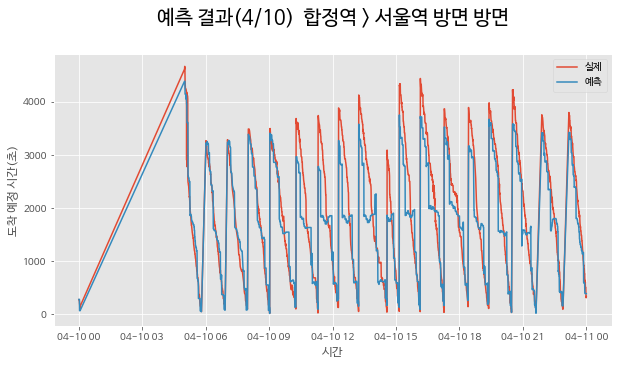

In [34]:
# 4월 10일 데이터 추출 및 예측값 생성
df_0410 = df_test_x[(df_test_x['bstopId_rabel']==0)
                    & (df_test_x['month'] == 4) & (df_test_x['day'] == 10)].copy()

df_0410_predict = XG_model.predict(df_0410)

# 실제 데이터와 비교를 위해서 result 데이터 프레임 생성
result=pd.concat([df[(df['bstopId_rabel']==0) & (df['month'] == 4) & (df['day'] == 10)].reset_index()
                  , pd.DataFrame(df_0410_predict, columns=['xgboost'])], axis=1, ignore_index=False)
result = result.set_index('ThisDT')
result = result.loc[:, ['ARRIVALESTIMATETIME', 'xgboost']]


# 그래프 생성
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("예측 결과(4/10)  합정역 > 서울역 방면 방면\n", fontsize=20)
plt.ylabel('도착 예정 시간(초)', fontsize=12)
plt.xlabel('시간', fontsize=12)
plt.plot(result, label = ['실제', '예측'])
plt.legend(fontsize=10)

In [35]:
result

,ARRIVALESTIMATETIME,xgboost
ThisDT,,
2022-04-10 00:01:01,279,282.899200
2022-04-10 00:01:30,279,282.899200
2022-04-10 00:01:58,226,282.899200
2022-04-10 00:02:27,202,70.180252
2022-04-10 00:02:55,177,70.180252
...,...,...
2022-04-10 23:57:56,507,390.230042
2022-04-10 23:58:25,507,390.230042
2022-04-10 23:58:53,343,390.230042


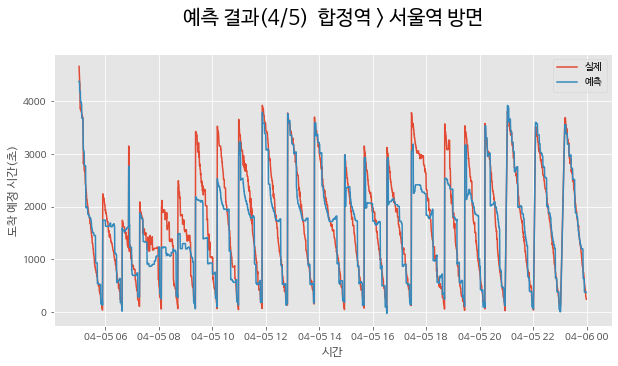

In [36]:
# 4월 5일 데이터 추출 및 예측값 생성
df_0405 = df_test_x[(df_test_x['bstopId_rabel']==0)
                    & (df_test_x['month'] == 4) & (df_test_x['day'] == 5)].copy()

df_0405_predict = XG_model.predict(df_0405)

# 실제 데이터와 비교를 위해서 result 데이터 프레임 생성
result=pd.concat([df[(df['bstopId_rabel']==0)& (df['month'] == 4) & (df['day'] == 5)].reset_index()
                  , pd.DataFrame(df_0405_predict, columns=['xgboost'])], axis=1, ignore_index=False)
result = result.set_index('ThisDT')
result = result.loc[:, ['ARRIVALESTIMATETIME', 'xgboost']]



# 그래프 생성
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("예측 결과(4/5)  합정역 > 서울역 방면\n", fontsize=20)
plt.ylabel('도착 예정 시간(초)', fontsize=12)
plt.xlabel('시간', fontsize=12)
plt.plot(result, label = ['실제', '예측'])
plt.legend(fontsize=10)

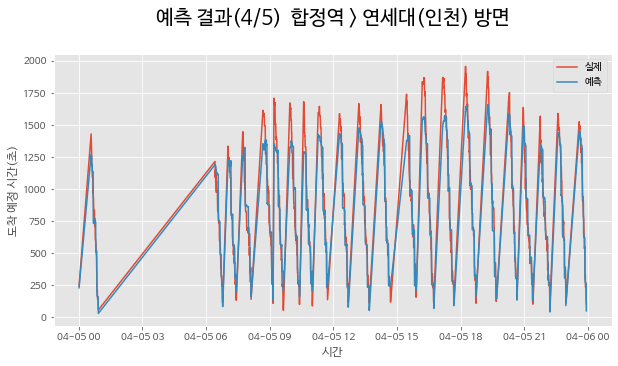

In [37]:
# 4월 5일 데이터 추출 및 예측값 생성
df_0405 = df_test_x[(df_test_x['bstopId_rabel']==2)
                    & (df_test_x['month'] == 4) & (df_test_x['day'] == 5)].copy()

df_0405_predict = XG_model.predict(df_0405)

# 실제 데이터와 비교를 위해서 result 데이터 프레임 생성
result=pd.concat([df[(df['bstopId_rabel']==2)& (df['month'] == 4) & (df['day'] == 5)].reset_index()
                  , pd.DataFrame(df_0405_predict, columns=['xgboost'])], axis=1, ignore_index=False)
result = result.set_index('ThisDT')
result = result.loc[:, ['ARRIVALESTIMATETIME', 'xgboost']]



# 그래프 생성
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("예측 결과(4/5)  합정역 > 연세대(인천) 방면\n", fontsize=20)
plt.ylabel('도착 예정 시간(초)', fontsize=12)
plt.xlabel('시간', fontsize=12)
plt.plot(result, label = ['실제', '예측'])
plt.legend(fontsize=10)

# 모델 저장

In [38]:
# 모델 저장
XG_model.save_model("saved_model/XGBoost.model")

# 모델 불러오기
# new_xgb_model = xgb.XGBRegressor() # 모델 초기화
# new_xgb_model.load_model("Bus_ML.model") # 모델 불러오기

# 추가 시각화

In [45]:
# bstopId
# 113000412	합정역	연세대(인천) 방면
# 113000424	합정역	서울역 방면
# 164000070	동춘역	서울역 방면
# 164000346	동춘역	연세대(인천) 방면

# df.loc[df.bstopId == 113000424, 'bstopId'] = 1
# df.loc[df.bstopId == 164000346, 'bstopId'] = 2
# df.loc[df.bstopId == 113000412, 'bstopId'] = 3
# df.loc[df.bstopId == 164000070, 'bstopId'] = 4
bstopId_list

[113000424, 164000346, 113000412, 164000070]

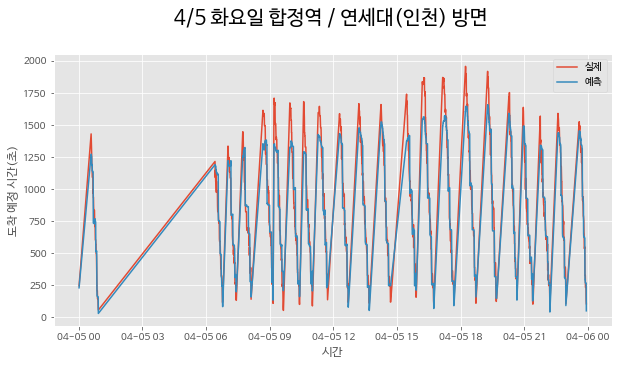

In [46]:
# 4월 5일 데이터 추출 및 예측값 생성
df_visualization = df_test_x[(df_test_x['bstopId_rabel']==2) 
                    & (df_test_x['month'] == 4) & (df_test_x['day'] == 5)].copy()

df_visualization_predict = XG_model.predict(df_visualization)

# 실제 데이터와 비교를 위해서 result 데이터 프레임 생성
result=pd.concat([df[(df['bstopId_rabel']==2) & (df['month'] == 4) & (df['day'] == 5)].reset_index()
                  , pd.DataFrame(df_visualization_predict, columns=['xgboost'])], axis=1, ignore_index=False)
result = result.set_index('ThisDT')
result = result.loc[:, ['ARRIVALESTIMATETIME', 'xgboost']]



# 그래프 생성
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("4/5 화요일 합정역 / 연세대(인천) 방면 \n", fontsize=20)
plt.ylabel('도착 예정 시간(초)', fontsize=12)
plt.xlabel('시간', fontsize=12)
plt.plot(result, label = ['실제', '예측'])
plt.legend(fontsize=10)

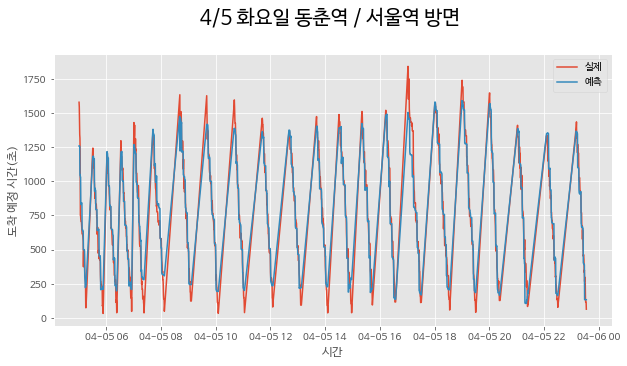

In [47]:
# 2월 22일 데이터 추출 및 예측값 생성
df_visualization = df_test_x[(df_test_x['bstopId_rabel']==3)
                    & (df_test_x['month'] == 4) & (df_test_x['day'] == 5)].copy()

df_visualization_predict = XG_model.predict(df_visualization)

# 실제 데이터와 비교를 위해서 result 데이터 프레임 생성
result=pd.concat([df[(df['bstopId_rabel']==3) & (df['month'] == 4) & (df['day'] == 5)].reset_index()
                  , pd.DataFrame(df_visualization_predict, columns=['xgboost'])], axis=1, ignore_index=False)
result = result.set_index('ThisDT')
result = result.loc[:, ['ARRIVALESTIMATETIME', 'xgboost']]



# 그래프 생성
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("4/5 화요일 동춘역 / 서울역 방면 \n", fontsize=20)
plt.ylabel('도착 예정 시간(초)', fontsize=12)
plt.xlabel('시간', fontsize=12)
plt.plot(result, label = ['실제', '예측'])
plt.legend(fontsize=10)

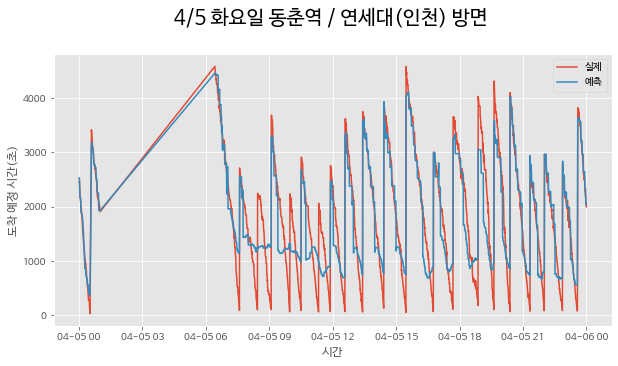

In [48]:
# 2월 22일 데이터 추출 및 예측값 생성
df_visualization = df_test_x[(df_test_x['bstopId_rabel']==1)
                    & (df_test_x['month'] == 4) & (df_test_x['day'] == 5)].copy()

df_visualization_predict = XG_model.predict(df_visualization)

# 실제 데이터와 비교를 위해서 result 데이터 프레임 생성
result=pd.concat([df[(df['bstopId_rabel']==1) & (df['month'] == 4) & (df['day'] == 5)].reset_index()
                  , pd.DataFrame(df_visualization_predict, columns=['xgboost'])], axis=1, ignore_index=False)
result = result.set_index('ThisDT')
result = result.loc[:, ['ARRIVALESTIMATETIME', 'xgboost']]



# 그래프 생성
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("4/5 화요일 동춘역 / 연세대(인천) 방면 \n", fontsize=20)
plt.ylabel('도착 예정 시간(초)', fontsize=12)
plt.xlabel('시간', fontsize=12)
plt.plot(result, label = ['실제', '예측'])
plt.legend(fontsize=10)

In [59]:
# 샘플 데이터 생성 함수

# 샘플 데이터 생성    서울역 방면 / 합정역 승차 / 2022년 4월 10일 7시예측값
df1 = df_test_x[(df_test_x['bstopId_rabel']==0) & (df_test_x['month'] == 4) 
                & (df_test_x['day'] == 10) & (df_test_x['hour'] == 7)].copy()


# 모델에 적용
xgboost = XG_model.predict(df1)
print("예측값:", xgboost)

result = pd.concat([df1.reset_index(), pd.DataFrame(xgboost, columns=['xgboost'])], axis=1, ignore_index=False)
result


예측값: [3234.779   3234.779   3234.779   3201.275   3201.275   3195.4104
 3195.4104  3270.0251  3270.0251  3248.8645  3248.8645  3248.8645
 3248.8645  3248.8645  3158.8035  3149.2432  3149.2432  3134.53
 3134.53    2676.669   2676.669   2652.0928  2652.0928  2652.0928
 2423.7544  2318.0098  2318.0098  2301.1433  2301.1433  1639.402
 1630.3867  1608.1831  1611.6207  1535.1442  1535.1442  1472.9045
 1472.9045  1406.4822  1406.4822  1406.4822  1361.7256  1361.7256
 1361.7256  1361.7256  1244.8536  1193.7853  1191.8566  1191.8566
  814.07404  814.07404  823.87646  823.87646  511.45837  511.45837
  464.02396  464.02396  466.41852  486.2675    82.19317   82.19317
   88.62362   88.62362   88.62362]


,index,bstopId_rabel,busId_rabel,Rest_Stop_Count,month,day,hour,minute,second,weekday,xgboost
0,235158,0,8,11,4,10,7,2,1,1,3234.779053
1,235160,0,8,11,4,10,7,2,30,1,3234.779053
2,235163,0,8,11,4,10,7,2,59,1,3234.779053
3,235166,0,8,11,4,10,7,3,27,1,3201.274902
4,235169,0,8,11,4,10,7,3,56,1,3201.274902
...,...,...,...,...,...,...,...,...,...,...,...
58,235309,0,8,2,4,10,7,55,14,1,82.193169
59,235311,0,8,2,4,10,7,55,43,1,82.193169
60,235313,0,8,2,4,10,7,56,11,1,88.623619
61,235315,0,8,2,4,10,7,56,39,1,88.623619


In [58]:
# df1.to_csv('ML_test.csv', index=False, header=None)